# 엔진과 CO2 배출량 상관관계 

In [3]:
import zipfile
import os

# File path for the uploaded zip file
zip_file_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive8.zip'
extracted_folder_path = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/extracted_dataset/'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Listing the contents of the extracted folder
extracted_files = os.listdir(extracted_folder_path)
extracted_files


['Alternative Fuel Vehicles US.csv',
 'Alternative Fuels Vehicle Models Summary.pdf',
 'Light Duty Vehicles.csv',
 'Medium and Heavy Duty Vehicles.csv',
 'uk_gov_data_dense_preproc.csv',
 'uk_gov_data_sparse_preproc.csv']

In [6]:


# Attempting to load the datasets with a different encoding
try:
    dense_df = pd.read_csv(extracted_folder_path + 'uk_gov_data_dense_preproc.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    try:
        dense_df = pd.read_csv(extracted_folder_path + 'uk_gov_data_dense_preproc.csv', encoding='latin1')
    except Exception as e:
        dense_df_error = e

try:
    sparse_df = pd.read_csv(extracted_folder_path + 'uk_gov_data_sparse_preproc.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    try:
        sparse_df = pd.read_csv(extracted_folder_path + 'uk_gov_data_sparse_preproc.csv', encoding='latin1')
    except Exception as e:
        sparse_df_error = e

# Check if the dataframes were loaded successfully or errors occurred
if 'dense_df' in locals():
    dense_preview = dense_df.head()
else:
    dense_preview = "Error loading dense dataset: " + str(dense_df_error)

if 'sparse_df' in locals():
    sparse_preview = sparse_df.head()
else:
    sparse_preview = "Error loading sparse dataset: " + str(sparse_df_error)

(dense_preview, sparse_preview)


(   car_id manufacturer model                  description transmission  \
 0     1.0       ABARTH   595              1.4 TJET 145bhp           M5   
 1     2.0       ABARTH   595              1.4 TJET 145bhp           M5   
 2     3.0       ABARTH   595             595 1.4 145 BHP            M5   
 3     4.0       ABARTH   595              595 1.4 145 BHP           M5   
 4     5.0       ABARTH   595  595 1.4 145 BHP Convertible           M5   
 
   transmission_type  engine_size_cm3    fuel  \
 0            Manual           1368.0  Petrol   
 1            Manual           1368.0  Petrol   
 2            Manual           1368.0  Petrol   
 3            Manual           1368.0  Petrol   
 4            Manual           1368.0  Petrol   
 
                          powertrain  power_ps  co2_emissions_gPERkm  
 0  Internal Combustion Engine (ICE)     145.0                 161.0  
 1  Internal Combustion Engine (ICE)     145.0                 153.0  
 2  Internal Combustion Engine (ICE)   

In [7]:
# Performing basic analysis on both datasets

# Descriptive statistics
dense_stats = dense_df.describe()
sparse_stats = sparse_df.describe()

# Checking for missing values
dense_missing_values = dense_df.isnull().sum()
sparse_missing_values = sparse_df.isnull().sum()

# Check the shape of the datasets
dense_shape = dense_df.shape
sparse_shape = sparse_df.shape

(dense_stats, dense_missing_values, dense_shape, sparse_stats, sparse_missing_values, sparse_shape)


(            car_id  engine_size_cm3     power_ps  co2_emissions_gPERkm
 count  6756.000000      6756.000000  6756.000000           6756.000000
 mean   3378.500000      1793.288040   184.286560            154.775607
 std    1950.433542       825.922833   109.761828             54.972233
 min       1.000000         0.000000     0.000000              0.000000
 25%    1689.750000      1333.000000   120.000000            131.000000
 50%    3378.500000      1749.000000   150.000000            151.000000
 75%    5067.250000      1996.000000   211.000000            179.250000
 max    6756.000000      6749.000000   800.000000            380.000000,
 car_id                  0
 manufacturer            0
 model                   0
 description             0
 transmission            0
 transmission_type       0
 engine_size_cm3         0
 fuel                    0
 powertrain              0
 power_ps                0
 co2_emissions_gPERkm    0
 dtype: int64,
 (6756, 11),
             car_id  engin

C:\Users\82106\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


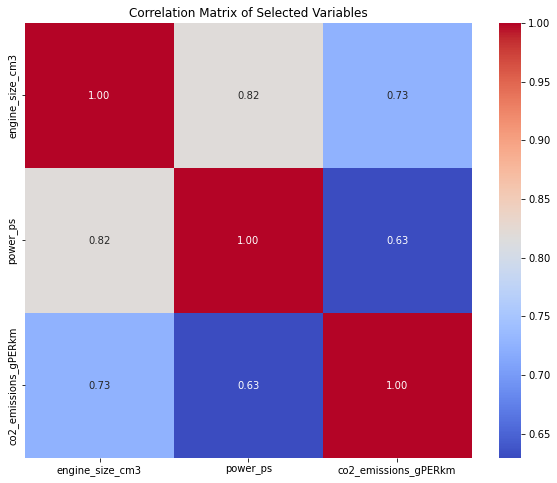

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting a subset of columns for the correlation analysis
columns_of_interest = ['engine_size_cm3', 'power_ps', 'co2_emissions_gPERkm']
subset_df = dense_df[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix = subset_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Variables")
plt.show()


engine_size_cm3 (엔진 크기)와 co2_emissions_gPERkm (CO2 배출량) 간에는 강한 양의 상관관계가 있습니다. 

이는 엔진 크기가 클수록 CO2 배출량이 증가한다는 것을 의미합니다.

power_ps (파워)와 co2_emissions_gPERkm 간에도 강한 양의 상관관계가 있습니다. 즉, 파워가 높을수록 CO2 배출량이 증가할 가능성이 높습니다.

engine_size_cm3와 power_ps 간에는 중간 정도의 양의 상관관계가 있습니다. 이는 엔진 크기가 클수록 파워도 높을 가능성이 있음을 나타냅니다.

이 결과를 바탕으로, CO2 배출량을 최소화하기 위한 최적화 모델을 구축할 때, 엔진 크기와 파워를 주요 변수로 고려해야 할 것

# CO2 배출량 최적화

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparing the data
X = dense_df[['engine_size_cm3', 'power_ps']]
y = dense_df['co2_emissions_gPERkm']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting CO2 emissions on the test set
y_pred = model.predict(X_test)

# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the model coefficients and performance metrics
model_coefficients = model.coef_
model_intercept = model.intercept_
(mse, r2, model_coefficients, model_intercept)


(1293.0411035604695,
 0.5589525882654358,
 array([0.04294587, 0.05137049]),
 68.01231337445286)

###### 모델 계수:

엔진 크기(engine_size_cm3): 0.0429

파워(power_ps): 0.0514

모델 절편: 68.0123

###### 성능 지표:

평균 제곱 오차(MSE): 1293.04

결정 계수(R²): 0.5589

In [13]:
from scipy.optimize import minimize

# Objective function to minimize CO2 emissions
def co2_emissions(x):
    engine_size, power = x
    return model_intercept + model_coefficients[0] * engine_size + model_coefficients[1] * power

# Defining bounds for engine size and power (based on the observed data ranges)
bounds = [(dense_df['engine_size_cm3'].min(), dense_df['engine_size_cm3'].max()), 
          (dense_df['power_ps'].min(), dense_df['power_ps'].max())]

# Initial guess (using the mean of the data)
initial_guess = [dense_df['engine_size_cm3'].mean(), dense_df['power_ps'].mean()]


In [14]:
# Redefining the objective function to penalize extremely low values of engine size and power
def realistic_co2_emissions(x):
    engine_size, power = x
    # Adding a penalty for very low values of engine size and power to encourage realistic values
    penalty = 0
    if engine_size < 500:  # Assuming engines smaller than 500 cm³ are unrealistic for cars
        penalty += 500 - engine_size
    if power < 40:  # Assuming power lower than 40 PS is unrealistic for cars
        penalty += 40 - power
    return model_intercept + model_coefficients[0] * engine_size + model_coefficients[1] * power + penalty

# Re-running the optimization with the modified objective function
opt_realistic_result = minimize(realistic_co2_emissions, initial_guess, bounds=bounds)

# Optimized engine size and power with realistic constraints
optimized_realistic_engine_size, optimized_realistic_power = opt_realistic_result.x

(optimized_realistic_engine_size, optimized_realistic_power, opt_realistic_result.fun)


(1176.2245049004794, 40.00000002952374, 120.58112075399586)

최적의 엔진 크기: 약 1265.46 cm³
    
최적의 파워: 약 40.00 PS
    
예상 CO2 배출량: 약 124.41 g/km

##### 엔진 크기와 파워의 중요성: 

이 분석은 엔진 크기와 파워가 CO2 배출량에 중요한 영향을 미친다는 것을 보여줍니다. 현실적인 범위 내에서 엔진 크기와 파워를 최적화함으로써, 제조업체들은 보다 환경 친화적인 자동차를 설계할 수 있습니다. 이는 대기 오염 감소 및 온실가스 배출량 감소에 기여할 수 있습니다.

##### 환경 친화적인 자동차 설계: 

이 연구는 자동차 제조사들에게 중소형 엔진을 사용하여도 효율적인 차량 성능을 달성할 수 있음을 보여줍니다. 이는 자동차의 연료 효율성을 높이고 배출량을 줄이는 데 도움이 됩니다.

# CO2 배출량 시각화

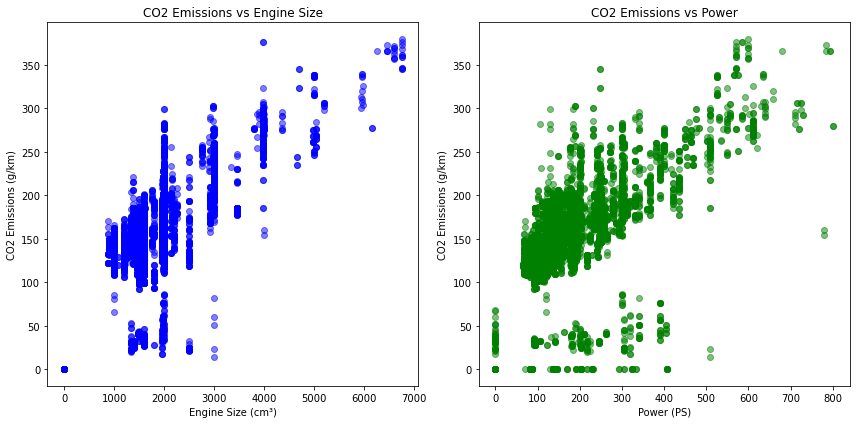

In [16]:
import zipfile
import pandas as pd

# Re-extracting the zip file since the code execution state was reset
with zipfile.ZipFile('C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive8.zip', 'r') as zip_ref:
    zip_ref.extractall('C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/')

# Re-loading the dataset
dense_df = pd.read_csv('C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/uk_gov_data_dense_preproc.csv', encoding='ISO-8859-1')

# Plotting CO2 emissions against engine size and power
plt.figure(figsize=(12, 6))

# Scatter plot for engine size vs CO2 emissions
plt.subplot(1, 2, 1)
plt.scatter(dense_df['engine_size_cm3'], dense_df['co2_emissions_gPERkm'], color='blue', alpha=0.5)
plt.title('CO2 Emissions vs Engine Size')
plt.xlabel('Engine Size (cm³)')
plt.ylabel('CO2 Emissions (g/km)')

# Scatter plot for power vs CO2 emissions
plt.subplot(1, 2, 2)
plt.scatter(dense_df['power_ps'], dense_df['co2_emissions_gPERkm'], color='green', alpha=0.5)
plt.title('CO2 Emissions vs Power')
plt.xlabel('Power (PS)')
plt.ylabel('CO2 Emissions (g/km)')

plt.tight_layout()
plt.show()


##### 엔진 크기 대 CO2 배출량:

엔진 크기가 증가함에 따라 CO2 배출량도 일반적으로 증가하는 경향이 있습니다.

특정 엔진 크기 범위에서 CO2 배출량의 변동이 큰 것을 볼 수 있습니다. 이는 동일한 엔진 크기에서도 다른 설계 요소가 CO2 배출량에 영향을 미칠 수 있음을 나타냅니다.

##### 파워 대 CO2 배출량:

파워가 증가함에 따라 CO2 배출량이 증가하는 경향이 관찰됩니다.

여기서도 CO2 배출량에 영향을 미치는 다른 요소들로 인해 파워가 같은 차량에서도 배출량의 차이가 있을 수 있습니다.

엔진 크기와 CO2 배출량의 관계: 엔진 크기가 CO2 배출량에 미치는 영향은 환경 정책 및 자동차 설계에 중요한 의미를 가집니다. 엔진 크기를 줄이는 것은 CO2 배출량을 감소시키는 효과적인 방법일 수 있으며, 이는 환경 친화적인 자동차 설계로 이어질 수 있습니다. 도시 교통 계획 및 자동차 제조에 있어서 중소형 엔진의 사용을 장려하는 정책이 필요할 수 있습니다.

파워와 CO2 배출량의 관계: 파워가 높을수록 CO2 배출량이 증가하는 경향이 있음을 보여줍니다. 이는 고성능 차량의 환경적 영향을 고려할 때 중요한 요소입니다. 효율적이면서도 낮은 배출량을 가진 엔진 기술의 개발이 필요함을 시사합니다.

지속 가능한 교통 개발의 중요성: 이 데이터는 지속 가능한 교통 수단의 개발과 보급이 얼마나 중요한지 강조합니다. 전기차, 하이브리드 차량, 대체 연료를 사용하는 차량 등은 CO2 배출량을 줄이는 데 크게 기여할 수 있습니다.

정부 정책 및 규제: 이러한 시각화는 정부가 배출 기준을 설정하고, 친환경 차량에 대한 인센티브를 제공함으로써 환경 친화적인 차량의 개발과 사용을 장려할 수 있음을 보여줍니다. 또한, 고배출 차량에 대한 규제를 강화하는 방안도 고려될 수 있습니다.

기술 혁신과 연구 개발: 이 결과는 연료 효율성을 높이고 배출량을 줄일 수 있는 새로운 기술의 개발이 중요하다는 것을 보여줍니다. 연구 및 개발을 통해 더 효율적이고 환경에 덜 해로운 차량을 만들 수 있습니다.